In [1]:
import pandas as pd

In [2]:
ads = pd.read_csv('Social_Network_Ads.csv')

In [3]:
ads.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
ads['User ID'].nunique()

400

In [5]:
ads.shape

(400, 5)

In [6]:
ads.set_index(['User ID'],inplace=True)

In [7]:
ads.head(10)

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0
15598044,Female,27,84000,0
15694829,Female,32,150000,1
15600575,Male,25,33000,0


In [8]:
ads.Gender.isna().sum()

0

In [9]:
ads.Gender.nunique()

2

In [10]:
ads['Gender'] = ads['Gender'].map({'Male':1,'Female':0})

In [11]:
ads.head(10)

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,1,19,19000,0
15810944,1,35,20000,0
15668575,0,26,43000,0
15603246,0,27,57000,0
15804002,1,19,76000,0
15728773,1,27,58000,0
15598044,0,27,84000,0
15694829,0,32,150000,1
15600575,1,25,33000,0


In [12]:
ads.groupby('Purchased').mean()

,Gender,Age,EstimatedSalary
Purchased,,,
0,0.505837,32.793774,60544.747082
1,0.461538,46.391608,86272.727273


In [13]:
def Normalize(data):
    return ((data-data.min())/(data.max()-data.min()))

In [14]:
ads.apply(Normalize)

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,1.0,0.023810,0.029630,0.0
15810944,1.0,0.404762,0.037037,0.0
15668575,0.0,0.190476,0.207407,0.0
15603246,0.0,0.214286,0.311111,0.0
15804002,1.0,0.023810,0.451852,0.0
...,...,...,...,...
15691863,0.0,0.666667,0.192593,1.0
15706071,1.0,0.785714,0.059259,1.0
15654296,0.0,0.761905,0.037037,1.0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<Figure size 1368x648 with 0 Axes>

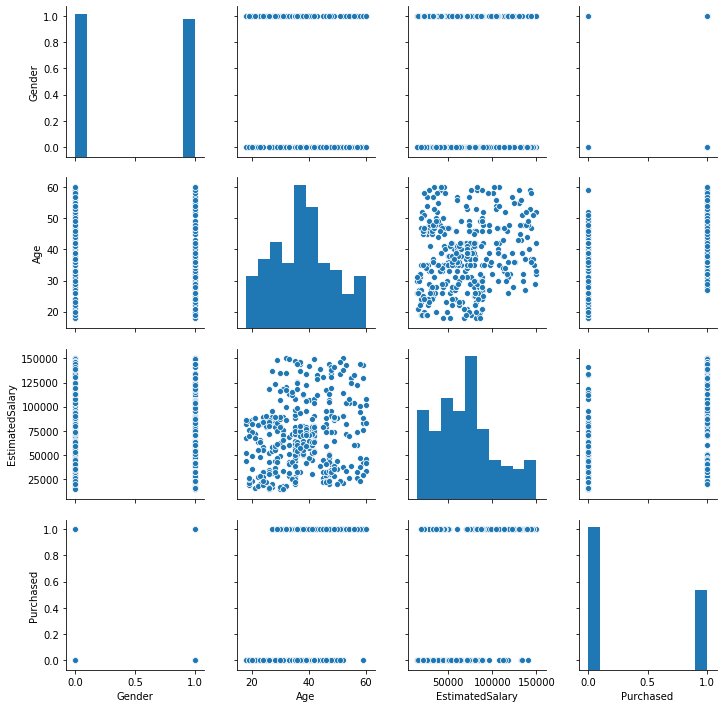

In [16]:
plt.figure(figsize=(19,9))

sns.pairplot(data=ads)

plt.show()

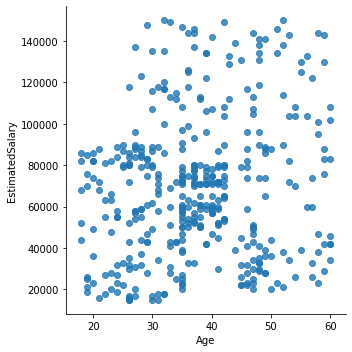

In [17]:
sns.lmplot('Age','EstimatedSalary',data=ads,fit_reg=False)

plt.show()

In [18]:
import statsmodels.api as sm

In [19]:
x = ads
x = x.drop('Purchased',1)
y = ads.Purchased
reg = sm.Logit(y,x)

In [20]:
reg = reg.fit()

Optimization terminated successfully.
         Current function value: 0.665320
         Iterations 4


In [21]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                -0.02048
Time:                        11:28:31   Log-Likelihood:                -266.13
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Gender             -0.8028      0.198     -4.061      0.000      -1.190      -0.415
Age                 0.0023      0.006      0.393      0.694      -0.009       0.014
EstimatedSalary   5.77e-07   2.84e-06      0.203      0.839   -4.98e-06    6.13e-06
===================================================================================
"""

In [22]:
x = x.drop('EstimatedSalary',1)

In [23]:
reg = sm.Logit(y,x)
reg = reg.fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.665371
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                -0.02056
Time:                        11:28:31   Log-Likelihood:                -266.15
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -0.8000      0.197     -4.056      0.000      -1.187      -0.413
Age            0.0033      0.003      0.965      0.334      -0.003       0.010
==============================================================================
"""

In [24]:
x = x.drop('Age',1)

reg = sm.Logit(y,x)
reg = reg.fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.666540
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      399
Method:                           MLE   Df Model:                            0
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                -0.02235
Time:                        11:28:31   Log-Likelihood:                -266.62
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gender        -0.6779      0.151     -4.485      0.000      -0.974      -0.382
==============================================================================
"""

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
xTrain,xTest, yTrain,yTest = train_test_split(x,y,test_size=0.2)

In [27]:
log = LogisticRegression()

In [28]:
log = log.fit(xTrain,yTrain)

In [29]:
yPred = log.predict(xTest)

In [30]:
answer = pd.DataFrame({'Actual':yTest,'Predict':yPred})

In [31]:
print(accuracy_score(yTest,yPred))

0.65


In [32]:
x = ads

In [33]:
x = x.drop('Purchased',1)
y=ads.Purchased

In [34]:
xTrain,xTest, yTrain,yTest = train_test_split(x,y,test_size=0.2)

log = LogisticRegression()

log = log.fit(xTrain,yTrain)

yPred = log.predict(xTest)

print(accuracy_score(yTest,yPred))

0.6375


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(yTest,yPred))

[[51  0]
 [29  0]]
